In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Hyperdimensional Shapes

In [28]:
def sampleCube(n,d,r=1):
    return rng.uniform(-r, r, size=(n, d))

In [30]:
def sampleSphere(n,d,r=1):
    z = rng.normal(size=(n, d))
    u = z / np.linalg.norm(z, axis=1, keepdims=True)
    return r * u

In [32]:
def sampleBall(n,d,r=1):
    z = rng.normal(size=(n, d))
    u = z / np.linalg.norm(z, axis=1, keepdims=True)
    radii = r * rng.random(n) ** (1.0 / d)
    return u * radii[:, None]

In [34]:
def sampleSimplex(n,d,r=1):
    z = rng.exponential(1.0, size=(n, d))
    s = z / z.sum(axis=1, keepdims=True)
    t = rng.random(n) ** (1.0 / d)
    return r * s * t[:, None]

#### Projection Methods

In [190]:
from sklearn.decomposition import PCA
from sklearn import random_projection

In [66]:
def pcaRecuction(points,d):
    pca = PCA(n_components=d)
    return pca.fit_transform(points) 

In [472]:
def randomReduction(points,d,seed=0):
    transformer = random_projection.GaussianRandomProjection(n_components=d, random_state=seed)
    return transformer.fit_transform(points)

#### Plotting Functions

##### Plotting With outline

In [255]:
def plotWithOutline(r,points,outline,size=10):
    x = points[:, 0]
    y = points[:, 1]
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=size)

    ax.set_xlim(-2*r, 2*r)
    ax.set_ylim(-2*r, 2*r)
    ax.set_aspect('equal', adjustable='box')  

    outline(ax, r, color='black', linewidth=2)
    
    plt.show()

In [293]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

def plotWithOutline3D(r, points, outline,size=10):
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, s=size)
    
    ax.set_xlim(-2*r, 2*r)
    ax.set_ylim(-2*r, 2*r)
    ax.set_zlim(-2*r, 2*r)
    ax.set_aspect('equal', adjustable='box')  
    
    outline(ax, r, color='black', linewidth=0.5)
    
    plt.show()

##### Plotting With outline - For Subplots function

In [315]:
def plotWithOutlineWithAx(r,points,outline,ax,size=10,linewidth=1,lim=[-2,2]):
    x = points[:, 0]
    y = points[:, 1]

    ax.scatter(x, y, s=size)

    ax.set_xlim(lim[0], lim[1])
    ax.set_ylim(lim[0], lim[1])
    ax.set_aspect('equal', adjustable='box')  

    outline(ax, r, color='black', linewidth=linewidth)
    
    return ax

In [540]:
def plotWithOutlineWithAx3D(r, points, outline3d, ax, size=10, linewidth=1, lim=(-2, 2)):
    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    ax.scatter(x, y, z, s=size)
    ax.set_xlim(lim[0], lim[1])
    ax.set_ylim(lim[0], lim[1])
    ax.set_zlim(lim[0], lim[1])
    try:
        ax.set_box_aspect((1, 1, 1))  # equal aspect in 3D (mpl >= 3.3)
    except Exception:
        pass
    if callable(outline3d):
        outline3d(ax, r, linewidth=linewidth, color="black")
    return ax

##### Multiple Plots

In [538]:
def mulptiplePlots2D(shapes,n=100,d=[2,3],r=1,size=10,linewidth=1):
    cols = len(shapes)
    rows = len(d)
    fig, axs = plt.subplots(rows, cols, squeeze=False, figsize=(4*cols, 3*rows))
    
    for i, (name, shape) in enumerate(shapes.items()):
        for j, dim in enumerate(d):
            if dim==2:
                axs[j, i] = plotWithOutlineWithAx(r,shape[0](n,dim,r),shape[1], axs[j, i],size,linewidth,shape[3])
            else: 
                axs[j, i] = plotWithOutlineWithAx(r,pcaRecuction(shape[0](n,dim,r),2),shape[1], axs[j, i],size,linewidth,shape[3])
            axs[j, i].set_title(f"{name}, d={dim}")
    
    plt.tight_layout()
    plt.show()

In [544]:
def mulptiplePlots3D(shapes, n=100, d=(3, 4), r=1, size=10, linewidth=1):
    cols = len(shapes)
    rows = len(d)

    fig, axs = plt.subplots(
        rows, cols, squeeze=False, figsize=(4*cols, 3.5*rows),
        subplot_kw={'projection': '3d'}
    )

    for i, (name, shape) in enumerate(shapes.items()):
        sampler   = shape[0]
        outline3d = shape[2]
        lim       = shape[3]

        for j, dim in enumerate(d):
            if dim == 3:
                pts3 = sampler(n, dim, r)
            elif dim > 3:
                pts3 = pcaRecuction(sampler(n, dim, r), 3)
            else:
                base = sampler(n, dim, r)
                pads = np.zeros((n, 3 - dim))
                pts3 = np.hstack([base, pads])

            ax = axs[j, i]
            plotWithOutlineWithAx3D(r, pts3, outline3d, ax, size=size, linewidth=linewidth, lim=lim)
            ax.set_title(f"{name}, d={dim}",y=0.95)

    plt.tight_layout()
    plt.show()

##### Outlines for plots

###### 2 Dimensional Shapes

In [51]:
def drawSquareOutline(ax,r=1,**kwargs):
    xs = [-r,  r,  r, -r, -r]
    ys = [-r, -r,  r,  r, -r]
    ax.plot(xs, ys, **kwargs)

In [53]:
def drawCircleOutline(ax,r=1,**kwargs):
    theta = np.linspace(0, 2*np.pi, 200)
    xs = r * np.cos(theta)
    ys = r * np.sin(theta)
    ax.plot(xs, ys, **kwargs)

In [55]:
def drawSimplexOutline(ax, r=1.0, **kwargs):
    xs = [0, r, 0, 0]
    ys = [0, 0, r, 0]
    ax.plot(xs, ys, **kwargs)

###### 3 Dimensional Shapes

In [58]:
def drawCubeOutline3D(ax, r=1.0, **kwargs):
    vertices = np.array([
        [-r, -r, -r],
        [ r, -r, -r],
        [ r,  r, -r],
        [-r,  r, -r],
        [-r, -r,  r],
        [ r, -r,  r],
        [ r,  r,  r],
        [-r,  r,  r]
    ])
    edges = [
        (0,1), (1,2), (2,3), (3,0),  # bottom square
        (4,5), (5,6), (6,7), (7,4),  # top square
        (0,4), (1,5), (2,6), (3,7)   # vertical edges
    ]
    for i, j in edges:
        ax.plot(
            [vertices[i][0], vertices[j][0]],
            [vertices[i][1], vertices[j][1]],
            [vertices[i][2], vertices[j][2]],
            **kwargs
        )

In [60]:
def drawSphereOutline3D(ax, r=1.0, n_longitudes=18, n_latitudes=18, **kwargs):
    """
    Wireframe sphere outline (globe style).
    - n_longitudes: number of meridians (vertical great circles)
    - n_latitudes: number of parallels between the poles (exclude the two poles)
    """
    t = np.linspace(0, 2*np.pi, 200)

    # Meridians (great circles in planes through the z-axis)
    for phi in np.linspace(0, 2*np.pi, n_longitudes, endpoint=False):
        x = r * np.cos(phi) * np.cos(t)
        y = r * np.sin(phi) * np.cos(t)
        z = r * np.sin(t)
        ax.plot(x, y, z, **kwargs)

    # Parallels (small circles at fixed latitude; skip the poles)
    latitudes = np.linspace(-np.pi/2, np.pi/2, n_latitudes + 2)[1:-1]
    for lat in latitudes:
        rho = r * np.cos(lat)
        x = rho * np.cos(t)
        y = rho * np.sin(t)
        z = np.full_like(t, r * np.sin(lat))
        ax.plot(x, y, z, **kwargs)

In [62]:
def drawSimplexOutline3D(ax, r=1.0, **kwargs):
    V = np.array([
        [0.0, 0.0, 0.0],
        [r,   0.0, 0.0],
        [0.0, r,   0.0],
        [0.0, 0.0, r  ],
    ])
    edges = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
    for i, j in edges:
        ax.plot([V[i,0], V[j,0]],
                [V[i,1], V[j,1]],
                [V[i,2], V[j,2]], **kwargs)

#### Work Environment

In [532]:
d = 3 # Dimension
r = 1 # radius
n = 1000 #Amount of random data

# Random Number Generator
seed = 0
rng = np.random.default_rng(seed)

In [337]:
Shapes = {"Circle": [sampleCube,drawSquareOutline,drawCubeOutline3D,[-2,2]],
          "Ball": [sampleBall,drawCircleOutline,drawSphereOutline3D,[-2,2]],
          "Simplex": [sampleSimplex,drawSimplexOutline,drawSimplexOutline3D,[-0.5,1.5]]}

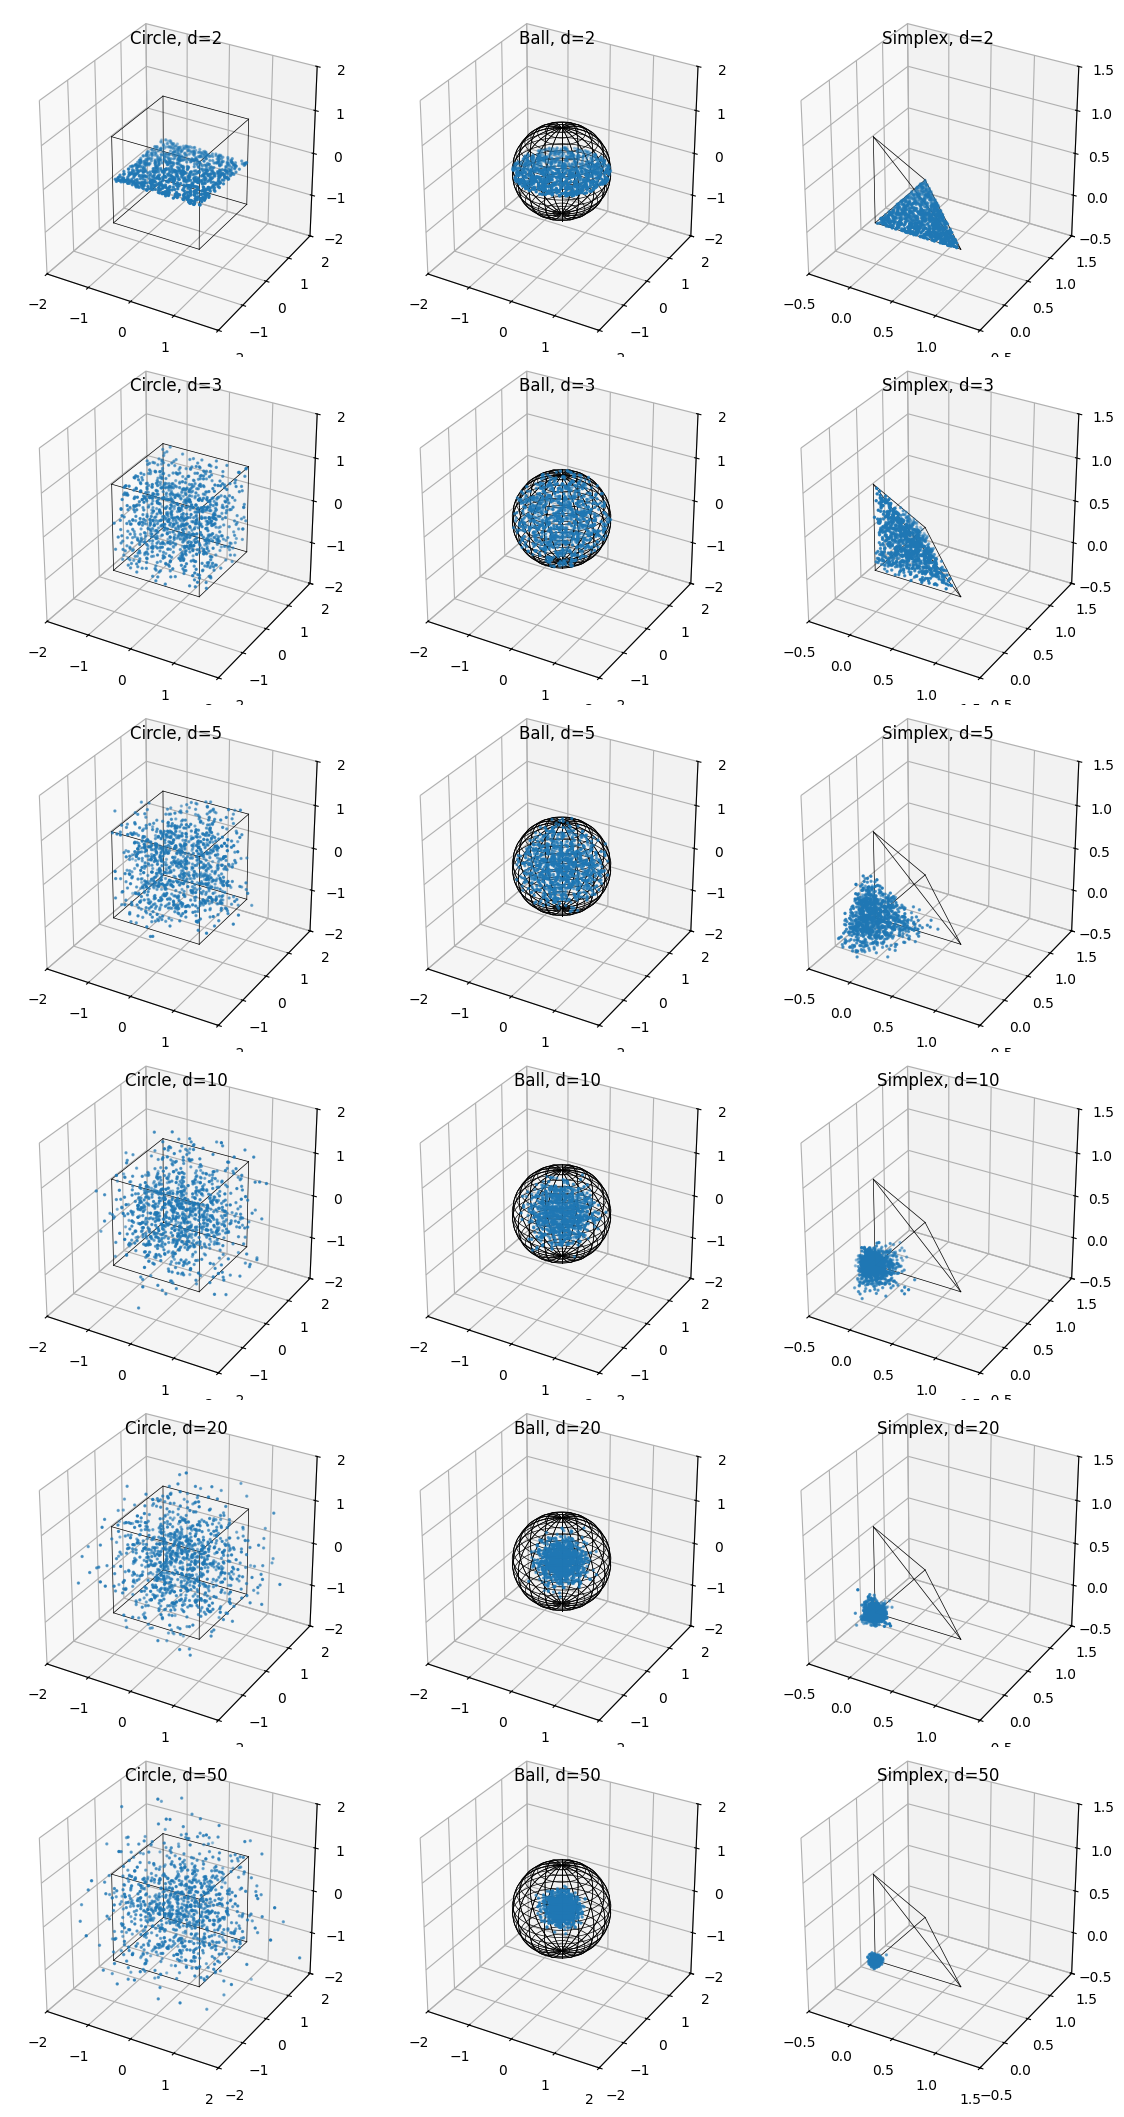

In [579]:
mulptiplePlots3D(Shapes,n,d=[2,3,5,10,20,50],size=2,linewidth=0.5)

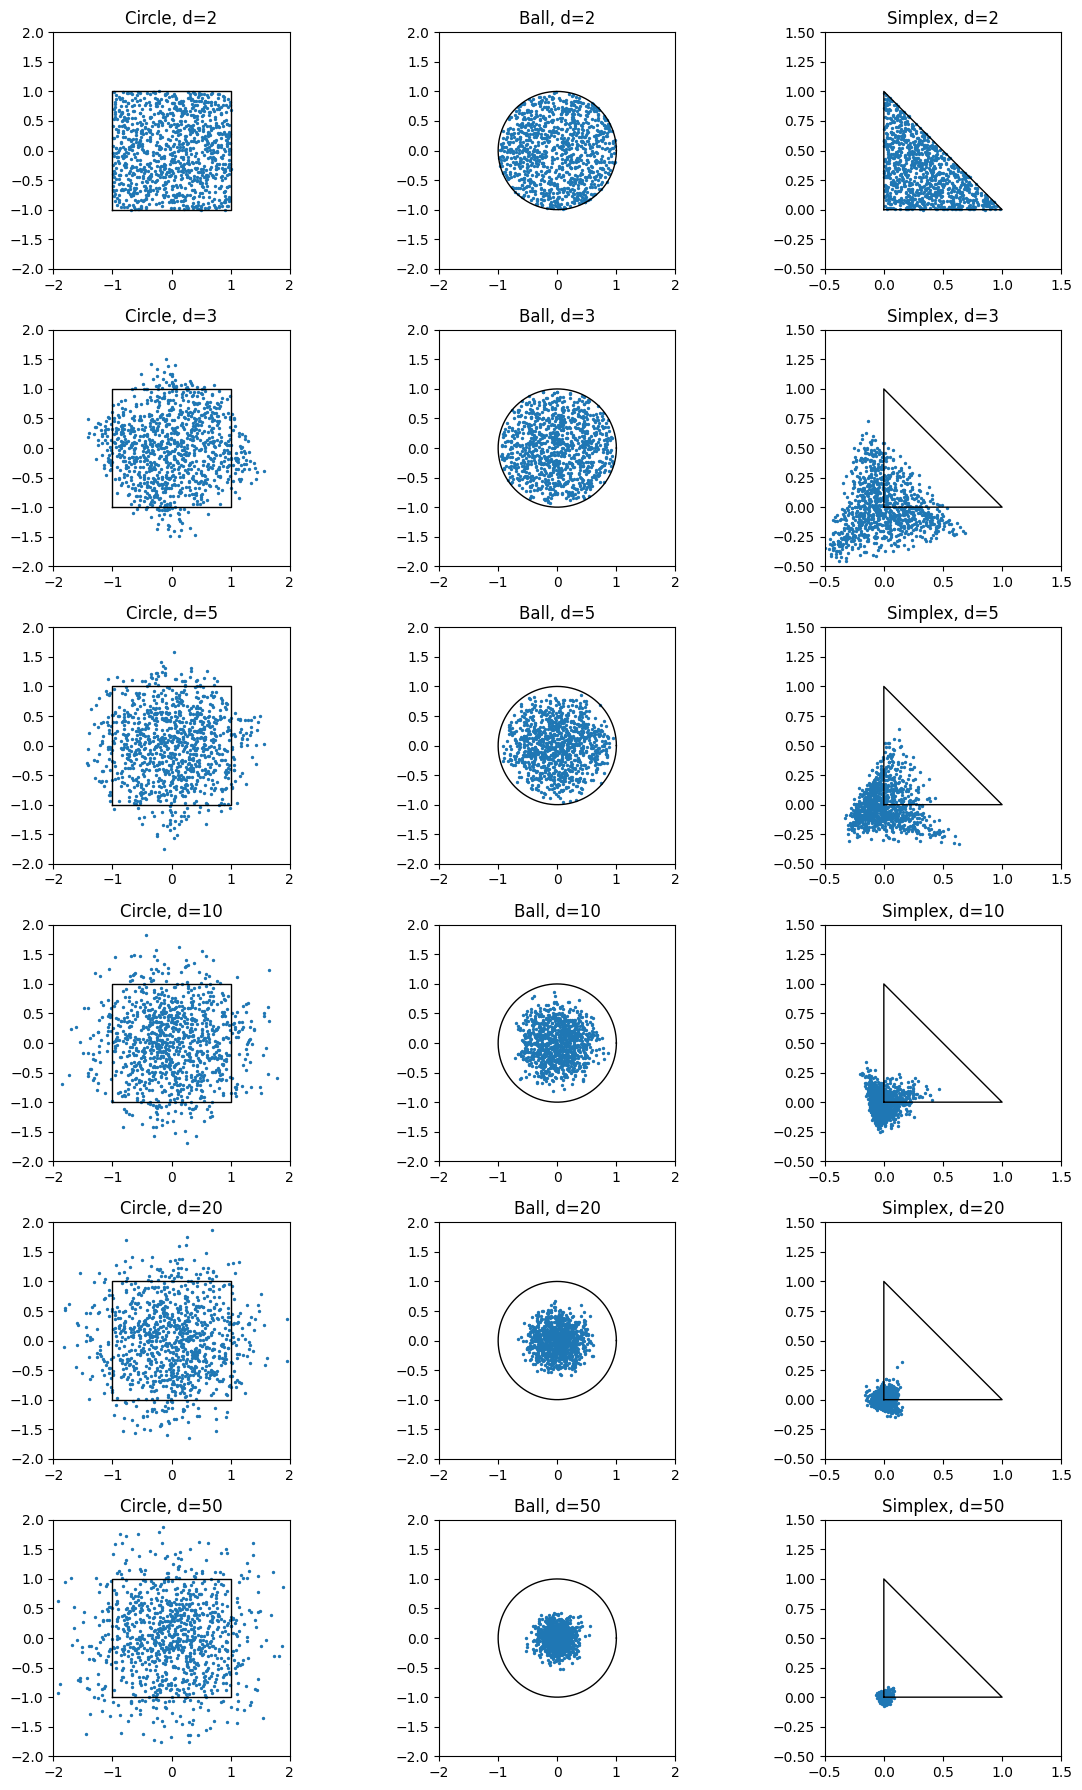

In [603]:
mulptiplePlots2D(Shapes,n,d=[2,3,5,10,20,50],size=2)

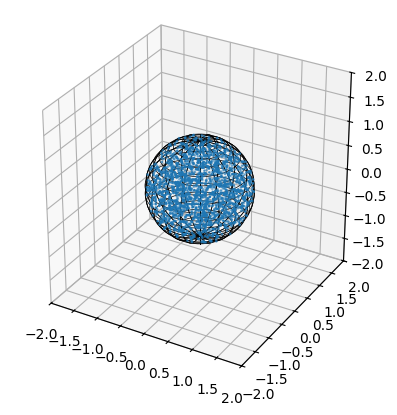

In [451]:
plotWithOutline3D(r,points,drawSphereOutline3D,1)